### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import src.generation as gen
import src.visualization as vis
import src.geometry as geo
import src.animations as ani

### Data

In [2]:
examples = [
    [[(0.2214654737903226, 0.3760541130514706), (0.47428805443548383, 0.8175369561887256)], [(0.5984816028225807, 0.8107967601102941), (0.904529989919355, 0.34909332873774507)], [(0.09283644153225806, 0.6928433287377451), (0.9400138608870968, 0.6389217601102941)], [(0.05291708669354839, 0.21765950520833327), (0.2259009576612903, 0.9489707797181373)], [(0.03961063508064516, 0.6220712699142157), (0.7071509576612903, 0.21765950520833327)], [(0.19928805443548386, 0.08622568167892147), (0.3789251512096774, 0.2513604856004901)], [(0.5009009576612903, 0.6119609757965687), (0.6605783770161291, 0.3558335248161764)], [(0.6672316028225806, 0.04241440716911754), (0.9754977318548387, 0.3558335248161764)]],
    [[(0.08618321572580645, 0.3604147518382353), (0.1615864415322581, 0.7580863204656862)], [(0.17489289314516132, 0.21887063419117642), (0.25251386088709676, 0.6333926930147058)], [(0.3456590221774194, 0.4143363204656862), (0.40997353830645167, 0.8288583792892157)], [(0.2613848286290323, 0.31660347732843136), (0.5718686995967742, 0.35367455575980383)], [(0.18376386088709679, 0.5626206341911764), (0.4720703125, 0.9400716145833334)], [(0.030739667338709697, 0.3503044577205882), (0.23920740927419354, 0.10765739889705872)], [(0.4853767641129032, 0.7648265165441177), (0.6916267641129032, 0.2727922028186274)], [(0.27469128024193545, 0.26605200674019597), (0.5009009576612903, 0.10428730085784305)], [(0.9355783770161291, 0.8355985753676471), (0.9333606350806453, 0.7816770067401961)], [(0.7160219254032258, 0.030145143995097934), (0.9644090221774194, 0.5659907322303921)]],
    [[(0.03295740927419355, 0.17168926164215675), (0.18154611895161293, 0.0031843596813724284)], [(0.05291708669354839, 0.42444661458333327), (0.44989289314516134, 0.030145143995097934)], [(0.09283644153225806, 0.7344956341911764), (0.7559412802419355, 0.04362553615196069)], [(0.25251386088709676, 0.9030005361519609), (0.9910219254032259, 0.12113779105392147)], [(0.5408203125, 0.943441712622549), (0.9865864415322582, 0.49858877144607844)], [(0.8379977318548387, 0.9400716145833334), (0.9732799899193548, 0.7985274969362746)], [(0.017433215725806445, 0.4177064185049019), (0.32791708669354835, 0.9569221047794119)], [(0.021868699596774205, 0.08406671262254894), (0.6051348286290322, 0.9805127910539215)], [(0.2968686995967742, 0.013294653799019507), (0.9156186995967742, 0.923221124387255)], [(0.6051348286290322, 0.09417700674019597), (0.9488848286290322, 0.6603534773284314)], [(0.8756993447580644, 0.09417700674019597), (0.9910219254032259, 0.2829024969362745)]],
    [[(0.0, 0.0), (1.0, 1.0)], [(1.0, 0.0), (0.0, 1.0)], [(0.0, 0.5), (1.0, 0.5)]]
]

### Segments intersections

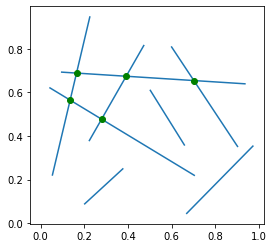

In [3]:
ani.IntersectionsAnimation(examples[0], ani.bentley_ottmann_generator(examples[0])).animation

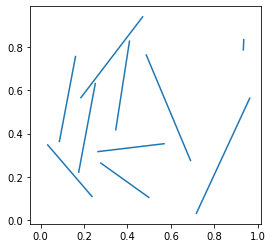

In [4]:
ani.IntersectionsAnimation(examples[1], ani.bentley_ottmann_generator(examples[1])).animation

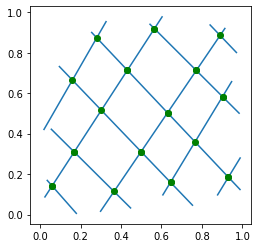

In [5]:
ani.IntersectionsAnimation(examples[2], ani.bentley_ottmann_generator(examples[2])).animation

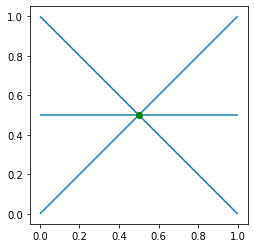

In [6]:
ani.IntersectionsAnimation(examples[3], ani.bentley_ottmann_generator(examples[3])).animation

### Interactive version

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

TOLERANCE = 0.15

def dist(point1, point2):
    return np.sqrt(np.power(point1[0] - point2[0], 2) + np.power(point1[1] - point2[1], 2))

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes
        self.adding_points = False
        self.added_points = []
        self.adding_lines = False
        self.added_lines = []
        self.adding_rects = False
        self.added_rects = []

    def set_axes(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw(autoscaling = True)

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw(autoscaling = True)
        
    def add_point(self, event):
        self.adding_points = not self.adding_points
        self.new_line_point = None
        if self.adding_points:
            self.adding_lines = False
            self.adding_rects = False
            self.added_points.append(PointsCollection([]))
         
    def add_line(self, event):   
        self.adding_lines = not self.adding_lines
        self.new_line_point = None
        if self.adding_lines:
            self.adding_points = False
            self.adding_rects = False
            self.added_lines.append(LinesCollection([]))

    def add_rect(self, event):
        self.adding_rects = not self.adding_rects
        self.new_line_point = None
        if self.adding_rects:
            self.adding_points = False
            self.adding_lines = False
            self.new_rect()
    
    def new_rect(self):
        self.added_rects.append(LinesCollection([]))
        self.rect_points = []
    
    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        new_point = (event.xdata, event.ydata)
        if self.adding_points:
            self.added_points[-1].add_points([new_point])
            self.draw(autoscaling = False)
        elif self.adding_lines:
            if self.new_line_point is not None:
                self.added_lines[-1].add([self.new_line_point, new_point])
                self.new_line_point = None
                self.draw(autoscaling = False)
            else:
                self.new_line_point = new_point
        elif self.adding_rects:
            if len(self.rect_points) == 0:
                self.rect_points.append(new_point)
            elif len(self.rect_points) == 1:
                self.added_rects[-1].add([self.rect_points[-1], new_point])
                self.rect_points.append(new_point)
                self.draw(autoscaling = False)
            elif len(self.rect_points) > 1:
                if dist(self.rect_points[0], new_point) < (np.mean([self.ax.get_xlim(), self.ax.get_ylim()])*TOLERANCE):
                    self.added_rects[-1].add([self.rect_points[-1], self.rect_points[0]])
                    self.new_rect()
                else:    
                    self.added_rects[-1].add([self.rect_points[-1], new_point])
                    self.rect_points.append(new_point)
                self.draw(autoscaling = False)
        
    def draw(self, autoscaling = True):
        if not autoscaling:
            xlim = self.ax.get_xlim()
            ylim = self.ax.get_ylim()
        self.ax.clear()
        for collection in (self.scenes[self.i].points + self.added_points):
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), **collection.kwargs)
        for collection in (self.scenes[self.i].lines + self.added_lines + self.added_rects):
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale(autoscaling)
        if not autoscaling:
            self.ax.set_xlim(xlim)
            self.ax.set_ylim(ylim)
        plt.draw()

In [8]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points, **kwargs):
        self.points = points
        self.kwargs = kwargs
    
    def add_points(self, points):
        self.points = self.points + points

class LinesCollection:
    def __init__(self, lines, **kwargs):
        self.lines = lines
        self.kwargs = kwargs
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        return mcoll.LineCollection(self.lines, **self.kwargs)
    
class Plot:
    def __init__(self, scenes = [Scene()], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self):
        plt.subplots_adjust(bottom=0.2)
        ax_prev = plt.axes([0.6, 0.05, 0.15, 0.075])
        ax_next = plt.axes([0.76, 0.05, 0.15, 0.075])
        ax_add_point = plt.axes([0.44, 0.05, 0.15, 0.075])
        ax_add_line = plt.axes([0.28, 0.05, 0.15, 0.075])
        ax_add_rect = plt.axes([0.12, 0.05, 0.15, 0.075])
        b_next = Button(ax_next, 'Następny')
        b_next.on_clicked(self.callback.next)
        b_prev = Button(ax_prev, 'Poprzedni')
        b_prev.on_clicked(self.callback.prev)
        b_add_point = Button(ax_add_point, 'Dodaj punkt')
        b_add_point.on_clicked(self.callback.add_point)
        b_add_line = Button(ax_add_line, 'Dodaj linię')
        b_add_line.on_clicked(self.callback.add_line)
        b_add_rect = Button(ax_add_rect, 'Dodaj figurę')
        b_add_rect.on_clicked(self.callback.add_rect)
        return [b_prev, b_next, b_add_point, b_add_line, b_add_rect]
    
    def add_scene(self, scene):
        self.scenes.append(scene)
    
    def add_scenes(self, scenes):
        self.scenes = self.scenes + scenes

    def toJson(self):
        return js.dumps([{"points": [np.array(pointCol.points).tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])    
     
    def get_added_points(self):
        if self.callback:
            return self.callback.added_points
        else:
            return None
  
    def get_added_lines(self):
        if self.callback:
            return self.callback.added_lines
        else:
            return None
        
    def get_added_figure(self):
        if self.callback:
            return self.callback.added_rects
        else:
            return None
    
    def get_added_elements(self):
        if self.callback:
            return Scene(self.callback.added_points, self.callback.added_lines+self.callback.added_rects)
        else:
            return None
    
    def draw(self):
        plt.close()
        fig = plt.figure()
        self.callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons()
        ax = plt.axes(autoscale_on = False)
        self.callback.set_axes(ax)
        fig.canvas.mpl_connect('button_press_event', self.callback.on_click)
        plt.show()
        self.callback.draw()

<IPython.core.display.Javascript object>


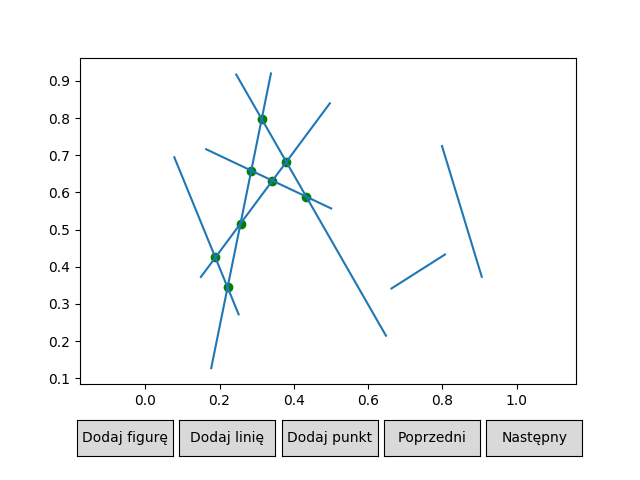

In [9]:
%matplotlib notebook
plot1 = Plot()
plot1.draw()

In [10]:
segments = plot1.get_added_elements().lines[0].lines
inter = geo.bentley_ottmann(segments)
vis.plot_points(inter, color='g')
print(len(inter))

8
